## Data Table & Visualization

For more reference, please visit my repository: https://github.com/StarsExpress/UChicago-Supplement<br />Thank you so much~🙏😄

### Imports & Setups

In [1]:
import os
import pandas as pd
from config import DATA_FOLDER_PATH
from scatter_plots.pass_rush_plot import plot_pass_rush

original_pass_rush_path = os.path.join(DATA_FOLDER_PATH, f"2024 NFL Front 7 Pass Rush.xlsx")
original_pass_rush_df = pd.read_excel(original_pass_rush_path, sheet_name=["DI", "ED"])
original_pass_rush_df = pd.concat([original_pass_rush_df["DI"], original_pass_rush_df["ED"]], axis=0)

### Data Table Function & Result

In [2]:
def compute_pass_rush_rank(
    metric: str, rate_name: str, position: str = None, teams: list = None, return_rank_df: bool = False
) -> pd.DataFrame | None:
    if position is not None:
        pass_rush_df = original_pass_rush_df[original_pass_rush_df["Position"] == position]

    else:
        pass_rush_df = original_pass_rush_df.copy()

    groupby_cols = ["PR Opp", metric, "TPS PR Opp", f"TPS {metric}"]
    pass_rush_df = pass_rush_df.groupby(by=["Team"], as_index=False, sort=False)[groupby_cols].sum()

    pass_rush_df[f"{rate_name}"] = pass_rush_df[metric] / pass_rush_df["PR Opp"]
    pass_rush_df[f"{rate_name}"] *= 100
    pass_rush_df[f"{rate_name}"] = pass_rush_df[f"{rate_name}"].round(2)
    pass_rush_df.insert(
        0, f"{rate_name} Rank", pass_rush_df[f"{rate_name}"].rank(method="min", ascending=False)
    )

    pass_rush_df.sort_values(by=f"{rate_name} Rank", ascending=True, inplace=True)
    if teams is not None:
        pass_rush_df = pass_rush_df[pass_rush_df['Team'].isin(teams)]

    cols = [f"{rate_name} Rank", "Team", f"{rate_name}", f"{metric}", "PR Opp"]
    if return_rank_df:
        return pass_rush_df[cols]
    print(pass_rush_df[cols].to_markdown(tablefmt="grid", index=False), '\n')

In [3]:
pass_rush_rank = compute_pass_rush_rank('Havoc', 'Havoc Rate', return_rank_df=True)
print(pass_rush_rank.head(10).to_markdown(tablefmt="grid", index=False))  # Due to page limit, I only show top 10.

+-------------------+--------+--------------+---------+----------+
|   Havoc Rate Rank | Team   |   Havoc Rate |   Havoc |   PR Opp |
+===================+========+==============+=========+==========+
|                 1 | DEN    |         4.74 |     131 |     2764 |
+-------------------+--------+--------------+---------+----------+
|                 2 | CHI    |         4.02 |      89 |     2213 |
+-------------------+--------+--------------+---------+----------+
|                 3 | SEA    |         3.83 |     101 |     2640 |
+-------------------+--------+--------------+---------+----------+
|                 4 | PIT    |         3.8  |     104 |     2740 |
+-------------------+--------+--------------+---------+----------+
|                 5 | DAL    |         3.62 |      85 |     2348 |
+-------------------+--------+--------------+---------+----------+
|                 6 | BLT    |         3.59 |      94 |     2620 |
+-------------------+--------+--------------+---------+-------

### Data Visualization

Due to page limit, I don't put the self-made plot function's code in Notebook. Its source code is at:<br />https://github.com/StarsExpress/UChicago-Supplement/blob/main/scatter_plots/pass_rush_plot.py

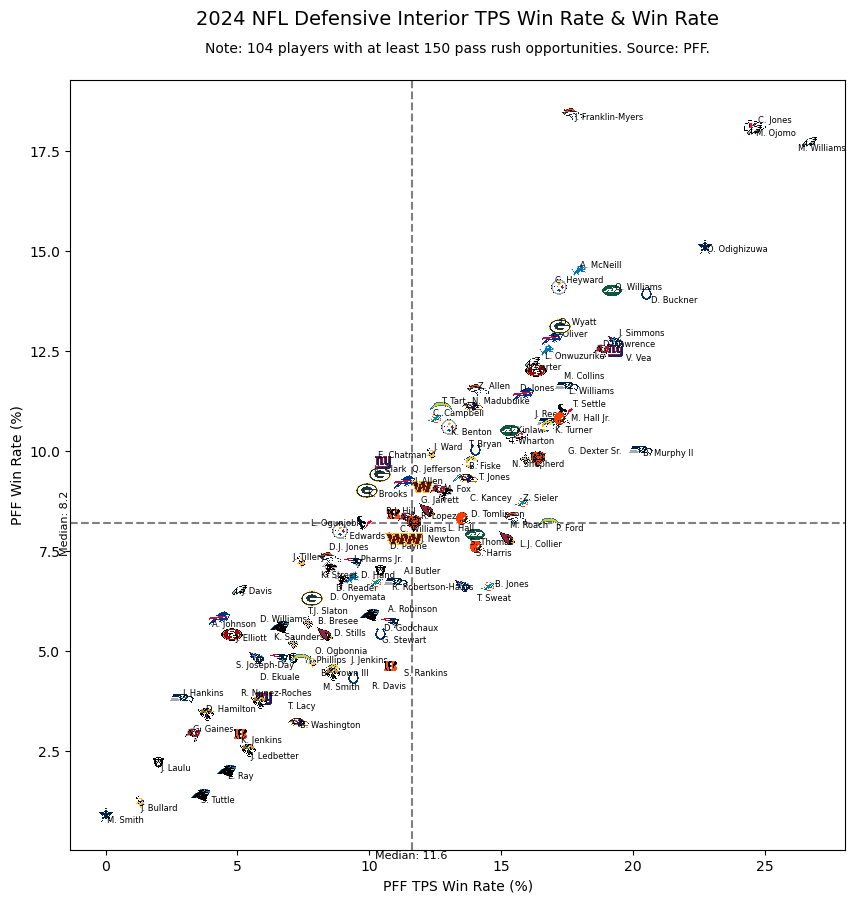

In [4]:
plot_pass_rush(2024, "DI", 150, "TPS Win Rate", "Win Rate")